In [1]:
# Linear Regression

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [3]:
DATA_FILE = 'data/birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [4]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X= tf.placeholder(tf.float32, shape=(), name ='x')
Y= tf.placeholder(tf.float32, shape=(), name ='y')

In [5]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w= tf.get_variable(name='w', initializer=tf.constant(0.0))
b = tf.get_variable(name='b', shape=[],
                    initializer=tf.random_normal_initializer())


In [6]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = w*X+b

In [7]:
# Step 5: use the square error as the loss function
loss = tf.square(Y-Y_predicted, name='loss')

In [11]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()


with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # Create a filewriter to write the model's graph to TensorBoard
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

    # Step 8: train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, loss_ = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += loss_

        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    #############################
    ########## TO DO ############
    #############################
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])

print('Took: %f seconds' %(time.time() - start))



Epoch 0: 1647.4587795533253
Epoch 1: 948.9809995466157
Epoch 2: 838.2236547313238
Epoch 3: 745.0232977045209
Epoch 4: 662.6082761330237
Epoch 5: 589.6710269846415
Epoch 6: 525.1224748898886
Epoch 7: 467.9987703557861
Epoch 8: 417.44759555929585
Epoch 9: 372.7134281425688
Epoch 10: 333.12772450833336
Epoch 11: 298.0989552379206
Epoch 12: 267.1038423335486
Epoch 13: 239.67865993872678
Epoch 14: 215.41331316797357
Epoch 15: 193.94402727125686
Epoch 16: 174.9495642011115
Epoch 17: 158.14524786195864
Epoch 18: 143.27940765815345
Epoch 19: 130.12894574172404
Epoch 20: 118.49654045834353
Epoch 21: 108.20741111014381
Epoch 22: 99.10701852381034
Epoch 23: 91.05829954690446
Epoch 24: 83.94041088362206
Epoch 25: 77.64574653739723
Epoch 26: 72.08043492743255
Epoch 27: 67.15921133407636
Epoch 28: 62.80865528319111
Epoch 29: 58.962845816874975
Epoch 30: 55.56340026870205
Epoch 31: 52.558428909169436
Epoch 32: 49.902982070900215
Epoch 33: 47.55619543318539
Epoch 34: 45.48286329758795
Epoch 35: 43.651

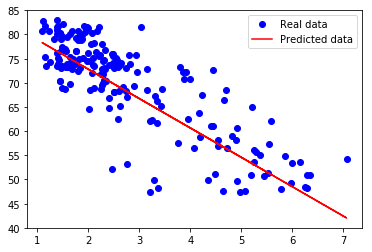

In [12]:
# uncomment the following lines to see the plot 
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()